### Import Libraries

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


import os
os.environ["OMP_NUM_THREADS"] = "1"

print("Hello ")

Hello 


### Load Dataset

In [17]:
df = pd.read_csv("C:\\Users\\sande\\Desktop\\HEAD Branch\\Customer Segmentation\\data\\Mall_Customers (1).csv")

### Basic Data UnderStanding

In [18]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Cleaning

In [19]:
df.isnull().sum()
df.drop_duplicates(inplace=True)

### Convert Gender to Numeric

In [20]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) 

## Exploratory Data Analysis

#### Age Distribution

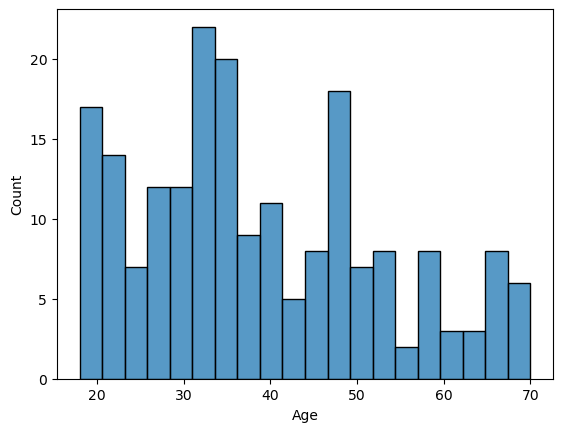

In [21]:
sns.histplot(df['Age'], bins=20)
plt.show()


#### Income vs Spending

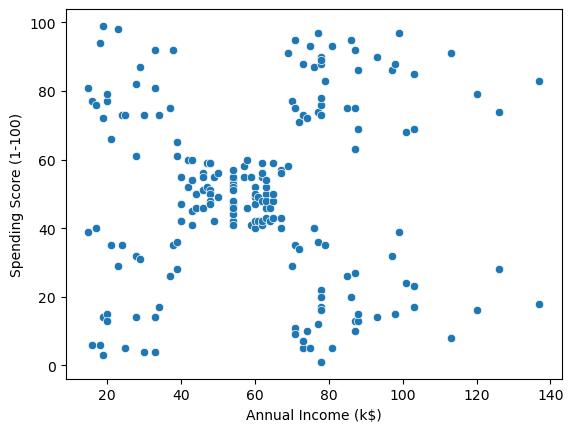

In [22]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.show()


### Gender Count

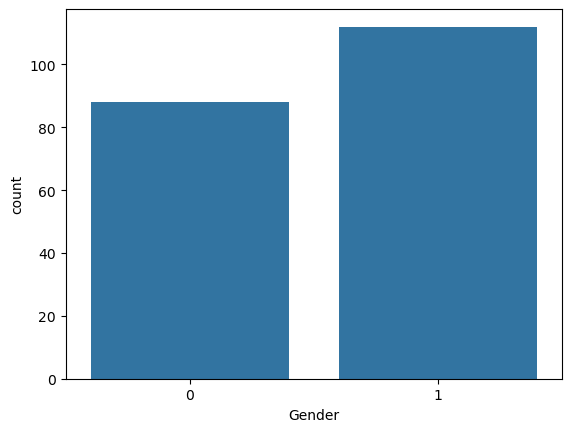

In [23]:
sns.countplot(x='Gender', data=df)
plt.show()


## Feature Selection for Clustering

In [24]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Elbow Method

In [26]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


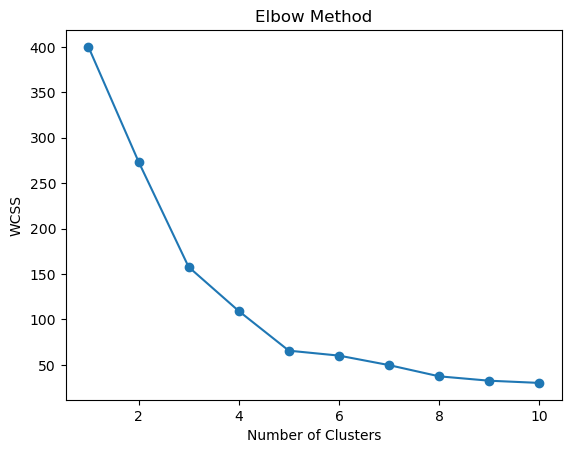

In [27]:


plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()



## Silhouette Score (Validation)

In [28]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

silhouette_score(X_scaled, labels)


0.5546571631111091

In [29]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


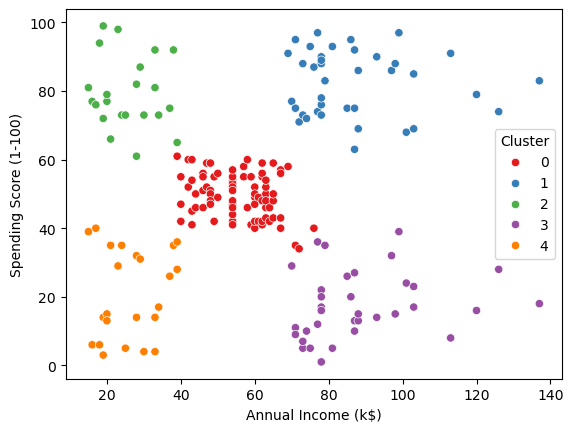

In [30]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df
)
plt.show()


## PCA Visualization

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


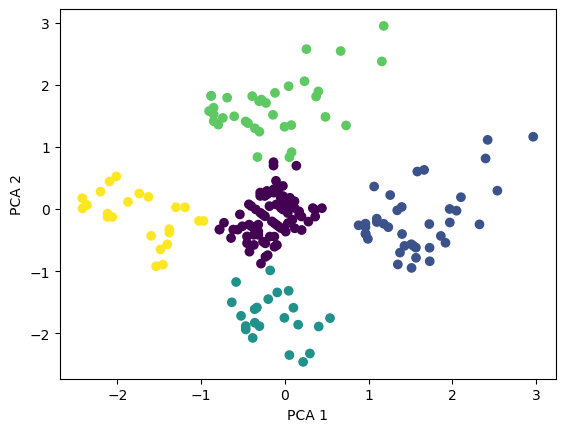

In [32]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [33]:
df.groupby('Cluster').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,86.320988,0.592593,42.716049,55.296296,49.518519
1,162.000000,0.538462,32.692308,86.538462,82.128205
2,23.090909,0.590909,25.272727,25.727273,79.363636
3,164.371429,0.457143,41.114286,88.200000,17.114286
4,23.000000,0.608696,45.217391,26.304348,20.913043


In [34]:
df.to_csv("Clustered_Customers.csv", index=False)


##                             END 